In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
from collections import Counter
from operator import itemgetter

import corrnet.letter_manager as lm
from corrnet.analytics import plot_degree_distributions

In [2]:
letter_manager = lm.LetterManager('data/letter_data.csv', date_col='Date',
                      sender_col='Sender', addressee_col='Receiver',
                      subject_col='Written for', provenance_col='Institution',
                      type_col='Recommendation Type')

/Users/dbblumenthal/code/pycharm/corrnet/corrnet/letter_manager.py:42: UserWarning: Found and ignored 3 letters with invalid dates.
  warnings.warn(f'Found and ignored {len(idx_bad_dates)} letters with invalid dates.', UserWarning)


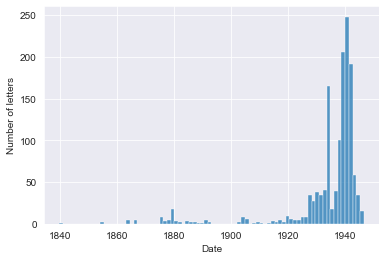

In [4]:
fig = letter_manager.plot_date_distribution(save_as='date_distr.pdf')

In [4]:
date_1 = pd.to_datetime('1920-01-10')
date_2 = pd.to_datetime('1925-01-10')
letter_manager._letter_data[(date_1 <= letter_manager._letter_data['Date']) & (letter_manager._letter_data['Date'] <= date_2)]

,index,Institution,Written for,Sender,Receiver,Date,Recommendation Type
109,112,American Friends Service Committee,Felix Robert,Zigarettenzeitung,Felix Robert,1920-06-15,X
110,113,Hebrew Uni Abgelehnt,Brieger Richard,Baumheier R.,Brieger Richard,1920-07-05,X
111,114,Hebrew Uni Abgelehnt,Baller Robert Adolf,Wiser,Baller Robert Adolf,1921-01-26,X
112,115,American Friends Service Committee,Oppenheimer Adolf Josef,"Blumenthal, Herz & Co",Oppenheimer Adolf Josef,1921-01-31,X
113,116,American Friends Service Committee,Weigl Karl,Strauss Richard,Weigl Karl,1921-03-12,X
114,117,American Friends Service Committee,Felix Robert,Kretschmer Ferdinand,Felix Robert,1921-09-15,X
115,118,Hebrew Uni Abgelehnt,Baller Robert Adolf,Pauer,Baller Robert Adolf,1921-11-26,X
116,119,Hebrew Uni Abgelehnt,Baller Robert Adolf,Romich,Baller Robert Adolf,1921-12-03,X
117,120,Arnholds,Arnhold Georg,Teuffel,Württembergiscche Regierung,1922-02-23,Y
118,121,American Friends Service Committee,Mauthner Ernst von,Peham Hofrat,Mauthner Ernst von,1922-10-31,X


In [3]:
g = letter_manager.to_digraph()

In [6]:
pr = nx.pagerank(g)

In [7]:
g.nodes['Bleichroeder Samuel']

{'roles': {'Sender'}, 'provenances': {'Bleichroeder'}}

In [8]:
h = nx.DiGraph()
h.add_edge(0, 1, provenances=set([1]))
h[0][1]['provenances'].add(2)
h[0][1]

{'provenances': {1, 2}}

In [9]:
nodes = [node for node in g.nodes() if 'Sender' in g.nodes[node]['roles']]

AttributeError: 'DiGraph' object has no attribute 'total_'

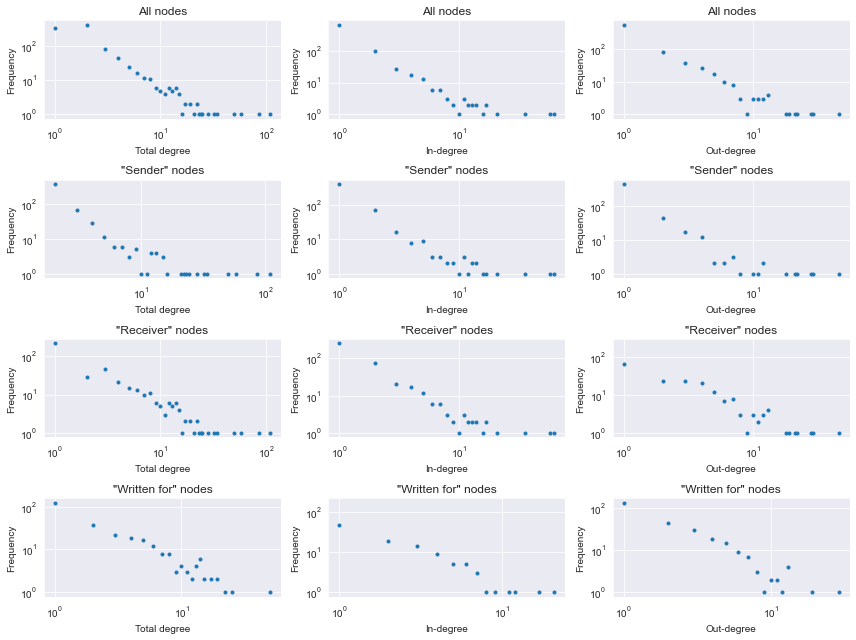

In [4]:
plot_degree_distributions(g, save_as='degrees.pdf')